In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'ant_cons'
run_name = '2p_nac5'
data_dir = 'data/' + system_name + '/' + run_name + '/'

### Importing the paramters

In [9]:
env_params = ut.read_params(data_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(data_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])

max_k 10.0
n_recipients 1.0
p_succ 0.9
p_consume 0.25
init_k [11. 11.]
alg_type nac
gamma 0.999
stop_by_discount true
n_steps 10000000.0
traj_points 100.0
a0 0.005
ac 33333.333333333336
a_expn 0.8
a_burn 5000000.0
b0 5e-06
bc 33333.333333333336
b_expn 0.8
b_burn 10000000.0
init_values 100.0


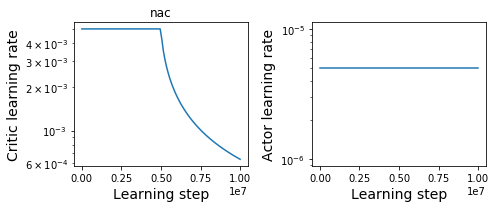

In [10]:
fig, (ax1, ax2) = ut.plot_lr(alg_params)
ax1.set_title(alg_params['alg_type'])
plt.tight_layout()
plt.savefig('plots/'+system_name+'/'+run_name+'/learning_rates.png', dpi=200)

### Importing the trajectories

In [11]:
v_traj, h = ut.read_2d_traj(data_dir+'/value_traj.txt')
r_traj, head = ut.read_traj(data_dir+'/return_traj.txt')

In [15]:
player = 0 # Player 0 for the forager, >0 for a recipient

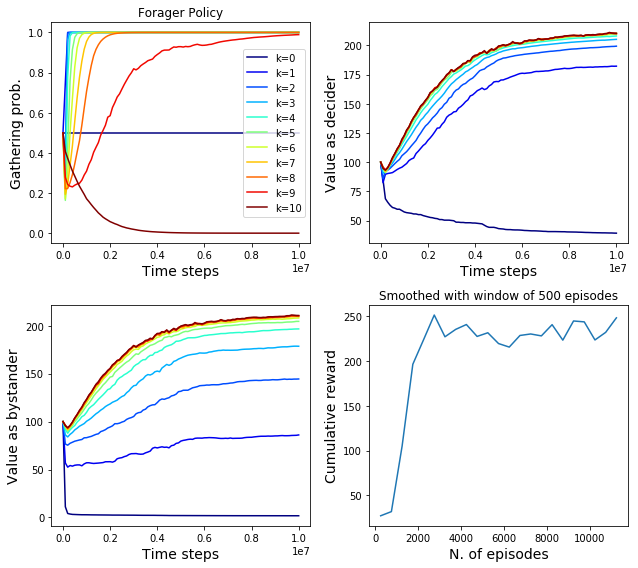

In [16]:
pol_par, h = ut.read_2d_traj(data_dir+'/policy'+str(player)+'_traj.txt')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(9,8))
colors = plt.cm.jet(np.linspace(0,1,int(env_params['max_k'])+1))
xs = np.linspace(0, alg_params['n_steps'], int(alg_params['traj_points']+1))

ax1.set_xlabel('Time steps', fontsize=14)
if player == 0:
    pol_str = 'Gathering'
    pl_str = 'Forager'
else:
    pol_str = 'Accept'
    pl_str = 'Recipient {}'.format(player)
ax1.set_ylabel(pol_str + ' prob.', fontsize=14)
ax1.set_title(pl_str + ' Policy')
for k in range(0,int(env_params['max_k'])+1):
    ax1.plot(xs, [p[k][0] for p in pol_par], c=colors[k], label="k={}".format(k))
ax1.legend()

ax2.set_xlabel('Time steps', fontsize=14)
ax2.set_ylabel('Value as decider', fontsize=14)
for k in range(0,int(env_params['max_k'])+1):
    ax2.plot(xs, np.array(v_traj)[:,player,k], color=colors[k])

ax3.set_xlabel('Time steps', fontsize=14)
ax3.set_ylabel('Value as bystander', fontsize=14)
for k in range(0,int(env_params['max_k'])+1):
    ax3.plot(xs, np.array(v_traj)[:,player,k+int(env_params['max_k'])+1], c=colors[k])

ax4.set_xlabel('N. of episodes', fontsize=14)
ax4.set_ylabel('Cumulative reward', fontsize=14)
wind_size=500
times, new_traj = ut.smooth_traj(np.array(r_traj)[:,player+1], wind_size)
ax4.set_title('Smoothed with window of {} episodes'.format(wind_size))
ax4.plot(times,new_traj)

plt.tight_layout()
plt.savefig('plots/'+system_name+'/'+run_name+'/learning_'+str(player)+'.png', dpi=200)

### Time scales

In [17]:
info_traj, h = ut.read_traj(data_dir+'/env_info_traj.txt')

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


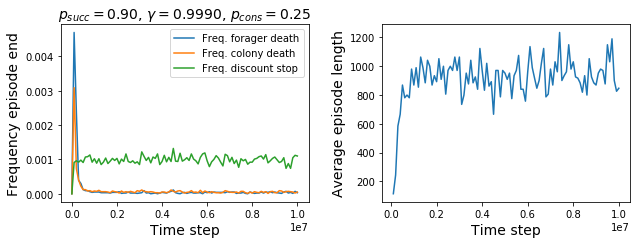

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3.5))
ax1.set_xlabel('Time step', fontsize=14)
ax1.set_ylabel('Frequency episode end', fontsize=14)
ax1.set_title(r"$p_{succ}=%3.2f$, $\gamma=%5.4f$, $p_{cons}=%3.2f$" %(env_params['p_succ'], alg_params['gamma'], env_params['p_consume']), fontsize=14)
ax1.plot(xs, info_traj[:,0], label='Freq. forager death')
ax1.plot(xs, info_traj[:,1], label='Freq. colony death')
ax1.plot(xs, info_traj[:,2], label='Freq. discount stop')
ax1.legend()

ax2.set_xlabel('Time step', fontsize=14)
ax2.set_ylabel('Average episode length', fontsize=14)
ax2.plot(xs, 1/(info_traj[:,0]+info_traj[:,1]+info_traj[:,2]))

plt.tight_layout()
plt.savefig('plots/'+system_name+'/'+run_name+'/times.png', dpi=200)